<a href="https://colab.research.google.com/github/RizaldyAli/machine-learning-ti3f/blob/main/Kuis2_TI3F_26_Rizaldy_Ali_M_OCR_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kuis 2 Pembelajaran Mesin TI - 3F**

---

> Nama : Rizaldy Ali Machfuddin <br>
> NIM : 2141720115 <br>
> No. Absen : 25 <br>
> Kelas : TI - 3F

---


# Import Library

In [1]:
import tensorflow as tf # Library yang digunakan untuk membangun dan melatih model kecerdasan buatan
import numpy as np # Sebagai library komputasi matematika dan pengelolaan array multidimensional
import pandas as pd # Berguna dalam import file seperti csv maupun excel dan membantu dalam manipulasi serte pengelolaan data dengan struktur DataFrame
import matplotlib.pyplot as plt # Membantu dalam memvisualisasikan data
import seaborn as sns # Berguna dalam kustomisasi plot dalam pyplot
from sklearn.preprocessing import LabelBinarizer # Kelas yang digunakan untuk melakukan one-hot encoding terhadap data label kategorikal
from sklearn.model_selection import train_test_split # Menunjang pembagian dataset menjadi data training dan data test
from sklearn.metrics import classification_report # Fungsi ini berguna untuk mengevaluasi kinerja model klasifikasi multikelas
import zipfile # Library yang membantu dalam ekstraksi file .zip

# Load Dataset

## Load MNIST

In [2]:
from keras.datasets import mnist # Mengimport dataset mnist

In [3]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data() # Memuat dataset mnist dan menyimpannya dalam keempat variabel tersebut

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Check shape data
(train_data.shape, test_data.shape) # Menampilkan ukuran dan dimensi data

((60000, 28, 28), (10000, 28, 28))

In [5]:
# Check shape labels
(train_labels.shape, test_labels.shape) # Menampilkan ukuran dan dimensi label

((60000,), (10000,))

In [6]:
# Check each data shape --> should be 28*28
train_data[0].shape # Menampilkan ukuran data pertama dari train_data

(28, 28)

In [7]:
# Check the label
train_labels.shape # Menampilkan ukuran data pertama dari train_labels

(60000,)

### Combine Train and Test Data

In [8]:
digits_data = np.vstack([train_data, test_data]) # Menggabungkan data train_data dan test_data dalam array secara vertikal
digits_labels = np.hstack([train_labels, test_labels]) # Menggabungkan data train_label dan test_label dalam array secara horizontal

In [9]:
# Check data shape
digits_data.shape # Menampilkan ukuran dan dimensi digits_data

(70000, 28, 28)

In [10]:
# Check label shape
digits_labels.shape # Menampilkan ukuran dan dimensi digits_labels

(70000,)

Text(0.5, 1.0, 'Class: 2')

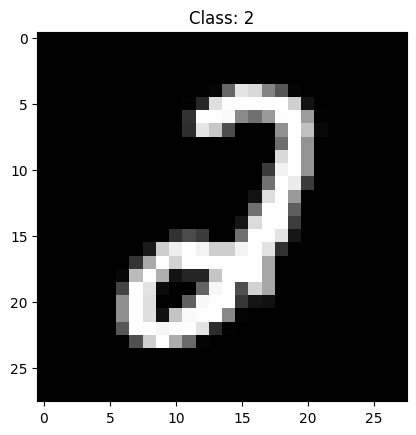

In [11]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0]) # Menentukan angka indeks acak berdasarkan panjang digits_data
plt.imshow(digits_data[idx], cmap='gray') # Menampilkan data dengan citra abu abu
plt.title('Class: ' + str(digits_labels[idx])) # Menambahkan judul pada plot

<Axes: xlabel='Labels', ylabel='count'>

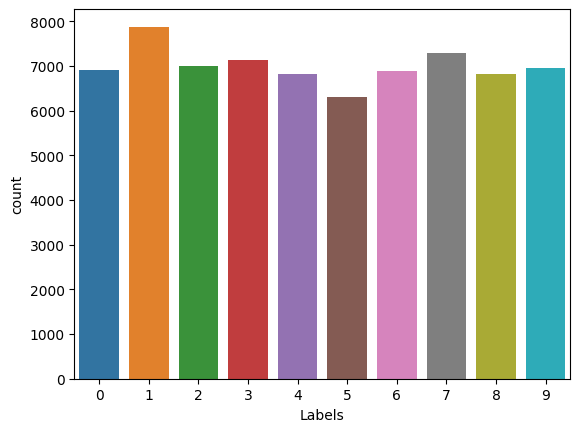

In [12]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels']) # Mengubah digits_labels menjadi 1 kolom DataFrame dengan nama Labels
sns.countplot(df_labels, x='Labels') # Menampilkan visualisasi data dengan x berupa labels dan y total atau count setiap label nya

## Load Kaggle A-Z

In [13]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip # Download file

--2023-12-05 08:42:34--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   233MB/s    in 0.8s    

2023-12-05 08:42:35 (233 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [14]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r') # Membuka file zip dengan mode read
zip_object.extractall('./') # Mengekstrak file di lokasi root
zip_object.close() # Menutup dan menyelesaikan objek zip_object

In [15]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32') # Import file csv sebagai DataFrame dataset_az
dataset_az # Menampilkan DataFrame dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1) # alphabet_data menyimpan data dataset_az dengan menghapus kolom 0
# Get labels only
alphabet_labels = dataset_az['0'] # Menyimpan data kolom 0 dataset_az

In [17]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape # Menampilkan ukuran dan dimensi data alphabet_data dan alphabet_labels

((372450, 784), (372450,))

In [18]:
# Check shape labels
alphabet_labels.shape # Menampilkan ukuran dan dimensi data alphabet_labels

(372450,)

In [19]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28)) # Mengubah dimensi data yang sebelumnnya 1 dimensi menjadi 2 dimensi dengan ukuran 28 x 28
# Check the result by its shape
alphabet_data.shape # Menampilkan ukuran dan dimensi data alphabet_data

(372450, 28, 28)

Text(0.5, 1.0, 'Class: 14.0')

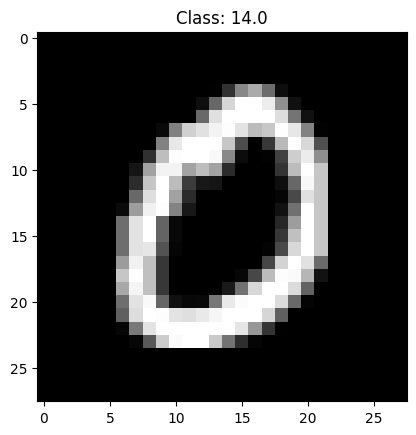

In [20]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])  # Menentukan angka indeks acak berdasarkan panjang digits_data
plt.imshow(alphabet_data[index], cmap = 'gray') # Menampilkan data dengan citra abu abu
plt.title('Class: ' + str(alphabet_labels[index])) # Menambahkan judul pada plot

<Axes: xlabel='Labels', ylabel='count'>

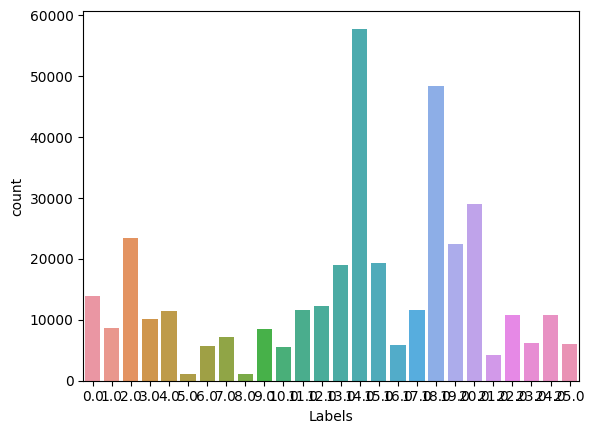

In [21]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
}) # Mengambil data labels dari alphabet
sns.countplot(df_az_labels, x='Labels') # Menampilkan visualisasi data dengan x berupa labels dan y total atau count setiap label nya

## Combine Dataset (MNIST + Kaggel A-Z)

In [22]:
# Check unique value from digits_labels
np.unique(digits_labels) # Menampilkan data unik dari digits_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [23]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels) # Menampilkan data unik dari alphabet_labels

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [24]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10 # Menambahkan 10 ke setiap value

In [25]:
# check alphabet labels again
np.unique(alphabet_labels) # Menampilkan data unik dari alphabet_labels

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [26]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data]) # Menggabungkan data alphabet_data dan digits_data dalam array secara vertikal
labels = np.hstack([alphabet_labels, digits_labels]) # Menggabungkan data alphabet_label dan digits_label dalam array secara horizontal

In [27]:
# Check the shape
data.shape, labels.shape # Menampilkan ukuran dan dimensi data dan labels

((442450, 28, 28), (442450,))

In [28]:
# Check labels
np.unique(labels) # Menampilkan data unik dari labels

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [29]:
# Convert data to float32
data = np.array(data, dtype = 'float32') # Mengubah tipe data menjadi float32

In [30]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1) # Menambahkan dimensi baru ke array numpy

# check shape
data.shape # Menampilkan ukuran dan dimensi data

(442450, 28, 28, 1)

# Preprocessing

In [31]:
# Normalize data
data /= 255.0 # Nomalisasi data untuk menghasilkan nilai dari 0 sampai 1 dengan membagi value dengan 255

In [32]:
# Check range value of data
data[0].min(), data[0].max() # Menampilkan rentang nilai dari min dan max

(0.0, 1.0)

In [33]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer() # Membuat objek LabelBinarizer
labels = le.fit_transform(labels) # Encoding data menjadi data numerik

In [34]:
# Check labels shape
labels.shape # Menampikan ukuran dan dimensi labels

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

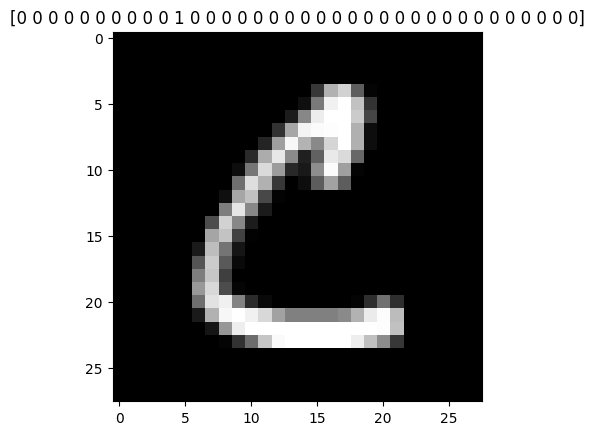

In [35]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray') # Menampilkan data indeks 30000 dengan citra gray dan ukuran 28 x 28
plt.title(str(labels[0])) # Menambahkan judul di plot

In [36]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0) # Menghitung jumlah kemunculan setiap label
classes_total # Menampilkan data classes total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [37]:
# Check the biggest value of data
classes_total.max() # Menampilkan value terbesar dari classes_total

57825

In [38]:
# Create a weight for each data
classes_weights = {} # Membuat inisialisasi variabel dictionary
for i in range(0, len(classes_total)): # Membuat iterasi dimulai dari 0 sampai value sebelum panjang variabel classes_total
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i] # Menambahkan valu hasil pembagian kedalam classes_weight key i

# Check the weight for each data
classes_weights # Menampilkan data classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# Split Data to Train and Test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels) # Membagi dataset dengan rasio data training 80% dan test 20%

## Create Data Augmentation

In [40]:
# Import library
from keras.preprocessing.image import ImageDataGenerator # Kelas yang berguna untuk melakukan augmentasi data gambar secara real-time

In [41]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False) # Membuat augmentasi yang dapat mengenali gambar walaupun gambar tersebut mengalami rotasi, zoom, pergeseran baik horizontal maupun vertikal namun menonaktifkan flip secara horizontal

# Build CNN Model

In [42]:
# Import library
from keras.models import Sequential # Berguna dalam membuat model multilayer
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense # Mengimport berbagai macam layer yang akan digunakan dalam Model CNN
from keras.callbacks import ModelCheckpoint # Membantu dalam menyimpan model secara berkala

In [43]:
# Build the network
network = Sequential() # Membuat objek sequential

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1))) # Menambah layer Conv2D kedalam model network dengan 32 filter dan kernel untuk konvolusi berukuran 3 x 3. ReLU digunakan sebagai fungsi aktivasi (x > 0 ? x : 0) dan ukuran input 28 x 28 x 1
network.add(MaxPool2D(pool_size=(2,2))) # Menambahkan layer pooling dengan ukuran 2 x 2 dengan mengambil nilai max dari hasil konvolusi.

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same')) # Menambah layer Conv2D kedalam model network dengan 64 filter dan kernel untuk konvolusi berukuran 3 x 3. ReLU digunakan sebagai fungsi aktivasi (x > 0 ? x : 0) dan menambahkan padding disekitar input dengna value 0 agar menghasilkan ukuran yang sama dengan citra yang dikonvolusi
network.add(MaxPool2D(pool_size=(2,2))) # Menambahkan layer pooling dengan ukuran 2 x 2 dengan mengambil nilai max dari hasil konvolusi.

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))  # Menambah layer Conv2D kedalam model network dengan 64 filter dan kernel untuk konvolusi berukuran 3 x 3. ReLU digunakan sebagai fungsi aktivasi (x > 0 ? x : 0) dan tidak menambahkan padding disekitar input agar menghasilkan ukuran yang lebih kecil citra yang dikonvolusi
network.add(MaxPool2D(pool_size=(2,2))) # Menambahkan layer pooling dengan ukuran 2 x 2 dengan mengambil nilai max dari hasil konvolusi.

network.add(Flatten()) # Menambahkan layer Flatten ke model yang merubah input fultidimensi menjadi 1 dimensi

network.add(Dense(64, activation = 'relu')) # Menambahkan hidden layer dengan 64 neuron dan fungsi aktivasi ReLU
network.add(Dense(128, activation = 'relu')) # Menambahkan hidden layer dengan 128 neuron dan fungsi aktivasi ReLU

network.add(Dense(36, activation='softmax')) # Menambahkan outpu layer dengan 36 neuron dan fungsi aktivasi softmax(hasil max dari kalkulasi value dengan niali e(euler))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) # Melakukan compile model (untuk perbaikan prediksi dan penentuan bobot) dengan fungsi kerugian berupa categorical_crossentropy, dengan optimizer adam dan matrics yang didasarkan dengan accuracy

In [44]:
# Check network summary
network.summary() # Menampilkan rincian model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [45]:
# Create actual labels
name_labels = '0123456789' # Inisialisasi name_labels
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' # Menambah data name_labels
name_labels = [l for l in name_labels] # Mensplit data menjadi data list

# Check actual label
print(name_labels) # Menampilkan list data name_labels

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [46]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model' # Inisialisasi variabel file_model, yang nantinya digunakan untuk nama model OCR yang akan disimpan
epochs = 20 # Inisialisasi variabel epochs
batch_size = 128 # Inisialisasi variabel batch_size, sebagai jumlah sampel untuk memperbarui bobot

In [47]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True) # Membuat checkpoint untuk menyimpan model ketika val_loss (validation loss) menurun selama training dilakukan, variabel ini akan digunakan sebagai callbacks, dengan mencetak epoch, loss, dan metrik yang dipantau saat model disimpan.

In [51]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size), # Melatih model network dengan input berupa hasil augmentasi data train dan batch size serta menyimpannya dalam variabel history
                      validation_data = (X_test, y_test), # Mengukur kinerja berdasarkan validation data dari data test
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs, # menentukan berapa kali generator dipanggil dan training sebanyak epochs
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer]) # Menentukan bobot berbeda berdasarkan classes_weight, mencetak ringkasan training setelah setiap epoch dengan menggunakan checkpointer sebagai argumen callbacks

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 1.1960 - accuracy: 0.8865
Epoch 1: val_loss improved from inf to 0.20276, saving model to custom_ocr.model
2765/2765 [==============================] - 477s 173ms/step - loss: 1.1960 - accuracy: 0.8865 - val_loss: 0.2028 - val_accuracy: 0.9180
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8980 - accuracy: 0.9079
Epoch 2: val_loss did not improve from 0.20276
2765/2765 [==============================] - 472s 171ms/step - loss: 0.8980 - accuracy: 0.9079 - val_loss: 0.2134 - val_accuracy: 0.9179
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7729 - accuracy: 0.9163
Epoch 3: val_loss did not improve from 0.20276
2765/2765 [==============================] - 485s 175ms/step - loss: 0.7729 - accuracy: 0.9163 - val_loss: 0.3144 - val_accuracy: 0.8598
Epoch 4/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7047 - accuracy: 0.9223
Epoch 4: val_loss did 

# Evaluate Model

## Make a Single Prediction

In [52]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size) # Melakukan prediksi dengan menggunakan atribut X_test dan argument batch_size sebesar 128

692/692 [==============================] - 23s 34ms/step


In [ ]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1] # Menampilkan hasil prediksi variabel predictions indeks ke-1

In [54]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1]) # Memperoleh indeks dengan value tertinggi

18

In [55]:
# Check label for 24
name_labels[18] # Mengecek label yang berada di indeks ke-18

'I'

In [56]:
# Check y_test label for 0
y_test[1] # Menampilkan hasil atau nilai aktual dari y_test ke-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
# check the highest value
np.argmax(y_test[1]) # Memperoleh indeks dengan value tertinggi

18

In [58]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])] # Menampilkan hasil atau nilai aktual dari indeks hasil value tertinggi y_test indeks ke-18

'S'

## Make an Evaluation on Test Data

In [59]:
# Evaluate on test data
network.evaluate(X_test, y_test) # Menampilkan hasil evaluasi model

2766/2766 [==============================] - 33s 12ms/step - loss: 0.1915 - accuracy: 0.9269


[0.19149263203144073, 0.9268956780433655]

In [ ]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels)) # Mengevaluasi model untuk klasifikasi data berdasarkan nilai aktuan dan prediksi serta target_names berupa name_labels

In [ ]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss']) # Memvisualisasikan data history val_loss

In [ ]:
# You can also check the another metrics
history.history.keys() # Menampilkan key yang dimiliki oleh history.history

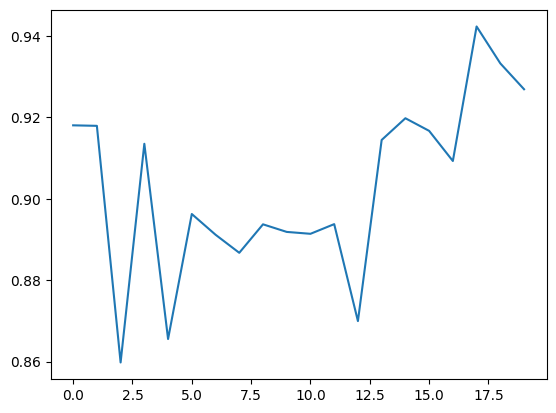

In [63]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])  # Memvisualisasikan data history val_accuracy

# Save The Model

In [64]:
# The result will show in colab directory
network.save('network', save_format= 'h5') # Menyimpan model CNN dengan format h5

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [65]:
# Import library
from keras.models import load_model # Digunakan untuk membantu dalam memuat model yang telah disimpan

In [66]:
# Load saved network
load_network = load_model('network') # Memuat model dengan nama atapun path network yang sudah disimpan sebelumnya dan disimpan dalam load_network

In [ ]:
# Check summary
load_network.summary() # Menampilkan rincian model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


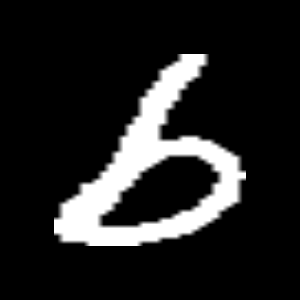

In [68]:
# Load Image
import cv2 # Library yang berguna dalam visi komputer
from google.colab.patches import cv2_imshow # Fungsi yang digunakan citra dalam google colab

from google.colab import drive # Membantu dalam memanfaatkan media penyimpanan Google Drive
drive.mount('/content/drive') # Memuat Google Drive

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ML/images/b_small.png') # Mengimport dan menyimpan citra dari path kedalam variabel img
cv2_imshow(img) # menampilkan citra yang sudah diimport di variabel img sebelumnya

In [69]:
# Check shape
img.shape # Menampilkan ukuran dan dimensi data img

(300, 300, 3)

In [70]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Merubah citra dari BGR ke Grayscale

# check shape
gray_img.shape # Menampilkan ukuran dan dimensi data gray_img

(300, 300)

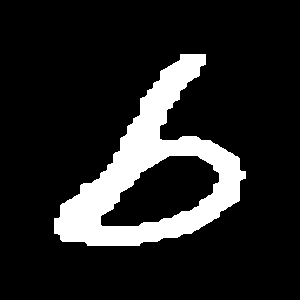

120.0


In [71]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # Melakukan thresholding untuk menghasilkan citra biner

cv2_imshow(thresh) # Menampilkan citra thresh

# print threshold value
print(value) # Menampilkan data value

In [72]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28)) # Merubah ukuran pixel citra menjadi 28 x 28
cv2_imshow(img_resize) # Menampilkan citra img_resize

In [73]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # Merubah tipe data menjadi float32 dan normalisasi data untuk menghasilkan value antara 0 sampai 1
img_input = np.expand_dims(img_input, axis=-1) # menambah dimensi array citra

# check shape
img_input.shape # Menampilkan ukuran dan dimensi data img_input

(28, 28, 1)

In [74]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1)) # Merubah array img_input menjadi 1 batch_size dengan ukuran 28 x 28 dan 1 channel
img_input.shape # Menampilkan ukuran dan dimensi data img_input

(1, 28, 28, 1)

In [75]:
# Make a predition
prediction = load_network.predict(img_input) # Melakukan prediksi berdasarkan citra img_input
pred_label = np.argmax(prediction) # Mengambil indeks dengan nilai tertinggi
pred_label # Menampilkan value pred_label

1/1 [==============================] - 1s 774ms/step


6

In [76]:
# check label for 6
# name_labels[6] # Menampilkan value name_labels indeks ke-6
name_labels[pred_label] # Menampilkan value name_labels indeks ke-6

'6'

**Analisis Hasil**

Meskipun model CNN yang telah di-latih sebelumnya memperoleh akurasi tinggi sebesar 0.96, namun prediksi yang dihasilkan masih belum sepenuhnya tepat, terutama dalam kasus citra yang menampilkan huruf 'b kecil' seperti pada contoh di atas. Hal ini terjadi karena ada kesamaan visual antara huruf 'b' dengan angka '6', yang menyebabkan model cenderung memprediksi gambar tersebut sebagai angka '6' berdasarkan indeks label yang mengidentifikasi '6'.

Dengan demikian, meskipun tingkat akurasi model tinggi, kemampuan model untuk membedakan antara 'b' dan '6' masih menjadi perhatian. Kecenderungan model untuk salah mengklasifikasikan gambar-gambar yang mirip secara visual merupakan salah satu tantangan yang perlu diperbaiki lebih lanjut dalam pengembangan model ini.